

The Bose-Hubbard Hamiltonian is given by:

$$
\hat{H} = -\mu \hat{n} + \frac{1}{2} \left( \hat{n} \cdot (\hat{n} - \mathbb{I}) \right) - t z \psi (\hat{a} + \hat{a}^\dagger) + t z \psi^2 \mathbb{I}
$$

Where:
- $\mu$ is the chemical potential,
- $\hat{n}$ is the number operator,
- $\mathbb{I}$ is the identity operator,
- $\hat{a}$ and $\hat{a}^\dagger$ are the annihilation and creation operators, respectively,
- $t$ is the hopping parameter, and
- $z$ is the lattice coordination number.

To solve the Bose-Hubbard model, we will use the mean field approximation, where we treat the annihilation operator \(\hat{a}\) and the creation operator $\hat{a}^\dagger$ as c-numbers $\alpha$ and $\alpha^*$ respectively.

## Implementation

We will use libraries like NumPy, SciPy, and Matplotlib to implement the mean field solution for the Bose-Hubbard model. Here's a explanation of the code:

1. **Create Local Operators**: We first define a function `create_local_operator(n_max)` to generate the local operators $\hat{a}$, $\hat{a}^\dagger$, $\hat{n}$, and $\mathbb{I}$ for a lattice with a maximum number of bosons $n_{\text{max}}$. For example, with $n_{\text{max}} = 3$, the matrices for the operators are:

$$
\hat{a} = \begin{bmatrix} 0 & \sqrt{1} & 0 \\ 0 & 0 & \sqrt{2} \\ 0 & 0 & 0 \end{bmatrix}, \quad
\hat{a}^\dagger = \begin{bmatrix} 0 & 0 & 0 \\ \sqrt{1} & 0 & 0 \\ 0 & \sqrt{2} & 0 \end{bmatrix}, \quad
\hat{n} = \begin{bmatrix} 0 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 2 \end{bmatrix}, \quad
\mathbb{I} = \begin{bmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \end{bmatrix}
$$

2. **Hamiltonian**: We define a function `ham(t, mu, z, psi, n_max)` to calculate the Hamiltonian of the system using the local operators. The Hamiltonian describes the energy of the system based on the parameters $t$, $\mu$, $z$, and the variational parameter $\psi$.

3. **Eigenvalues and Eigenvectors**: Next, we define a function `eig_val_vec(t, mu, z, psi, n_max)` to find the lowest eigenvalue of the Hamiltonian using the NumPy `linalg.eigh` function. The lowest eigenvalue corresponds to the ground state energy of the system.

4. **Optimization**: We define a function `find_psi(t, mu, z, n_max)` to find the optimal value of \(\psi\) that minimizes the ground state energy. The optimization is performed using the `minimize_scalar` function from the SciPy library.

5. **Visualization**: Finally, we sweep through the values of \(t/U\) and \(\mu/U\) for specified ranges, find the optimal \(\psi\) for each combination, and visualize the results as a heatmap using Matplotlib. The color in the heatmap represents the optimal value of \(\psi\) for different \(t/U\) and \(\mu/U\) values.

## Conclusion

By implementing the mean field solution for the Bose-Hubbard model, we gain insights into the ground state properties of the system under different conditions. This approach allows us to understand the behavior of bosonic particles on a lattice and explore phenomena such as Bose-Einstein condensation and superfluidity.

In [2]:
# Import necessary libraries

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar
from tqdm import tqdm


# Define a function to create local operators for the Bose-Hubbard model

def create_local_operator(n_max):
    # Creation operator 'a'
    a = np.diag(np.sqrt(np.arange(1, n_max+1)), 1)
    
    # Annihilation operator 'a_dag'
    a_dag = a.T
    
    # Number operator 'n'
    n = np.dot(a_dag, a)
    
    # Identity operator 'I'
    I = np.identity(n_max+1)
    
    return a, a_dag, n, I

# a, a_dag, n, I = create_local_operator(3)
# print(a)
# print(a_dag)
# print(n)
# print(I)

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [09:47<00:00,  1.17s/it]


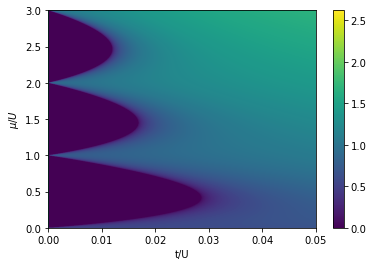

In [5]:
# Define the Hamiltonian of the Bose-Hubbard model

def ham(t, mu, z, psi, n_max):
    a, a_dag, n, I = create_local_operator(n_max)
     # Hamiltonian of the system
    ham = -mu * n + 0.5 * (n.dot(n - I)) - t * z * psi * (a + a_dag) + t * z * psi ** 2 * I
    return ham


# Define a function to calculate the lowest eigenvalue of the Hamiltonian
def eig_val_vec(t, mu, z, psi, n_max):
    H = ham(t, mu, z, psi, n_max)
    # Calculate the eigenvalues and eigenvectors of the Hamiltonian
    E, psi = np.linalg.eigh(H)
    return E[0]


# Define a function to find the optimal value of psi that minimizes the eigenvalue
def find_psi(t, mu, z, n_max):
    def e_min(psi):
        return eig_val_vec(t, mu, z, psi, n_max)
    res = minimize_scalar(e_min)
    return res.x



# Set the maximum number of bosons in each site
n_max = 10

# Define the range of t/U values for the plot
t_var = np.linspace(0, 0.05, 500)

# Define the range of mu/U values for the plot
mu_var = np.linspace(0, 3, 500)

# Set the value of the lattice coordination number
z = 6

# Initialize an empty list to store the optimal values of psi
psi_new = []

# Loop over t/U values
for t in tqdm(t_var):
     # Loop over mu/U values
    for mu in mu_var:
#         print(t, mu)
        # Find the optimal value of psi that minimizes the eigenvalue
        psi_new.append(np.abs(find_psi(t, mu, z, n_max)))
 
# Convert the list of psi values into a numpy array and reshape it for the plot
psi_new = np.array(psi_new)
psi_new = psi_new.reshape(len(t_var), len(mu_var))

# Create a heatmap to visualize the optimal values of psi
plt.imshow(psi_new.T, origin='lower', extent=(0, 0.05, 0, 3), aspect="auto")
plt.xlabel('t/U')
plt.ylabel('$\\mu/U$')
plt.axis('tight')
plt.colorbar()
plt.show()